In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def cañon_acierta_castillo():
    """"
    Área de comentarios

    -----------------------------------------------------------------------------------------------------------
    La función ha de llamarse sin entradas.
    Pedírá al usuario que ingrese la magnitud de la velocidad inicial con la que se dispara el proyectil,
    el ángulo de inclinación del cañón, la altura y anchura del Castillo Objetivo y las coordenadas en las que se situa
    la base de este. 
    
    *Se  puede disparar a coordenadas negativas de x
    
    La función devuelve si el proyectil impacta o no en el castillo, si lo hace indica los parámetros del lanzamiento.
    En cualquier caso se muestra un gráfico del lanzamiento.
    
    Se asume que siemre el cañón dispara desde la coordenada (0,0
    --------------------------------------------------------------------------------------------------------
    """
   
    xo = 0
    yo = 0
    a=-9.8
    ro=[xo,yo]
    
    px = float(input("Ingrese la posición horizontal del centro de la base del Castillo (m)= "))
    py = float(input ("Ingrese la posición vertical del centro de la base del Castillo (m)= "))
    
    try:
        h = float(input("Ingrese altura del castillo (m)= "))
        w = float(input("Ingrese anchura del castillo (m)= "))
        vo = float(input("Ingrese la magnitud de velocidad inicial del lanzamiento en (m/s)= "))
        angulo_elevacion = float(input ("Ingrese el ángulo de elevación del cañon en grados= "))
        assert(vo >= 0 and 180>=angulo_elevacion>=0 and h>=0 and w>=0)
    
    except AssertionError:
        print("Ha ingresado alguna magnitud negativa o un ángulo fuera del rango de 0 a 180 grados")
        print("Intentelo de nuevo ingresando valores correctamente")
        return(None)
    
    vxo = vo*math.cos(math.radians(angulo_elevacion))
    vyo = vo*math.sin(math.radians(angulo_elevacion))
    vector_vo = [vxo, vyo]
    
    x = lambda t:  xo+vxo*t
    y = lambda t: yo+vyo*t+a*0.5*t**2
    r = lambda t: [x(t),y(t)]
    
    duracion_lanzamiento=-2*vyo/a
    
    m=h/(2*w)
    b1=h+py-m*px
    b2=h+py+m*px
    
    tiempo=0
    
    while (tiempo <= duracion_lanzamiento):
        if(px-w/2<=x(tiempo)<=px+w/2):
            if (y(tiempo)<=py+3*h/4):
                print("El proyectil impacta en el Castillo")
                break
            else:
                if(x(tiempo)<=px):
                    if (y(tiempo)<=m*x(tiempo)+b1):
                        print("El proyectil impacta en el Castillo")
                        break
                else:
                    if (y(tiempo)<=-m*x(tiempo)+b2):
                        print("El proyectil impacta en el Castillo")
                        break
        tiempo=tiempo+1/64
        
        
    if tiempo >= duracion_lanzamiento:
        print("Proyectil no impacta en el Castillo")
    else:
        print("Los parámetros del lanzamiento son:")       
        print(f"* La posición incial del cañon es= {ro} m")
        print(f"* Las componentes de velocidad inicial del proyectil= {vector_vo} m/s")
        print(f"* El ángulo de elevación del cañon es {angulo_elevacion} grados")
        print(f"* El tiempo que tarda en impactar es= {tiempo} con un tiempo de duración del lanzamiento de {duracion_lanzamiento}")
        print(f"* La coordenada del impacto es aproximadamente: {r(tiempo)} m")
        
    t=np.arange(0,tiempo,1/64)
    rx=list(x(t))
    ry=list(y(t))
    
    ancho_del_castillo = [px-w/2,px+w/2]
    base_castillo = [py,py]
    
    ubicacion_columnas = [px-w/2,px,px+w/2]
    sup_castillo = [3*h/4+py,py+h,3*h/4+py]
    
    
    dominio = [px-w/2-1/8]
    dominio.extend(ancho_del_castillo)
    dominio.append(px+w/2+1/8)
    
    terreno=[0]
    terreno.extend(base_castillo)
    terreno.append(0)
    
    rango_altura = [py,3*h/4+py]
    pared_izquierda = [(px-w/2), (px-w/2)]
    pared_derecha = [(px+w/2),(px+w/2)]

    plt.plot(rx, ry,color='r',label="Trayectoria del proyectil")
    plt.title("Trayectoria del proyectil")
    plt.xlabel("Recorrido (m)")
    plt.ylabel("Altitud (m)")
    plt.plot(ubicacion_columnas, sup_castillo, color='b', label="Castillo")
    plt.plot(dominio, terreno, color='g', label="Terreno del Castillo")
    plt.plot(pared_izquierda, rango_altura,color='b')
    plt.plot(pared_derecha, rango_altura,color='b')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


Ingrese la posición horizontal del centro de la base del Castillo (m)= -143
Ingrese la posición vertical del centro de la base del Castillo (m)= 2
Ingrese altura del castillo (m)= 4
Ingrese anchura del castillo (m)= 20
Ingrese la magnitud de velocidad inicial del lanzamiento en (m/s)= 52
Ingrese el ángulo de elevación del cañon en grados= 161
Proyectil no impacta en el Castillo


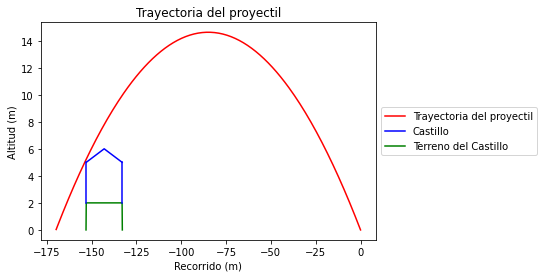

In [49]:
cañon_acierta_castillo()